In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.utils.np_utils import to_categorical 
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf

print('Libraries Imported')

Libraries Imported


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
## Label Encoding
# convert to one-hot-encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Converted into one-hot-encoding')
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

# As we see after one-hot-encoding the shape of our label changes to [num_of_rows, 10]
# 10 because we have 10 categories i.e [airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck]

Converted into one-hot-encoding
y_train shape:  (50000, 10)
y_test shape:  (10000, 10)


In [ ]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

# Here we are dividing our actual values from 255.0 so we get all the new values near to 1
# Hence making calcualtions easy and fast

X_train shape:  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3), padding='same'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 128, kernel_size= (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.3))

#fully connected
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(4096, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4096, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
# output layer, 10 because we have total 10 categories
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# Define optimizer
optimizer = Adam(learning_rate = 0.001)
optimizer2 = SGD(learning_rate = 0.001, momentum=0.9, nesterov=True)

In [ ]:
#Compile the model
model.compile(optimizer = optimizer2, loss = 'categorical_crossentropy', metrics=['accuracy'])
epochs = 30 # for better result increase the epochs
batch_size = 200
datagen = ImageDataGenerator(
    rotation_range= 5, # randomly rotate images in the range 5 degrees
    zoom_range = 0.1, # Randomly zoom image 10%
    width_shift_range=0.1, # randomly shift images horizontally 10%
    height_shift_range=0.1, # randomly shift images vertically 10%
    horizontal_flip = True,
    vertical_flip = True
)

datagen.fit(X_train)
history = model.fit(datagen.flow(X_train, y_train),
                    epochs = epochs, validation_data = (X_test, y_test),
                    steps_per_epoch=X_train.shape[0] // batch_size, callbacks = [callback])

Epoch 1/30
250/250 [==============================] - 132s 526ms/step - loss: 58.5630 - accuracy: 0.1150 - val_loss: 55.7796 - val_accuracy: 0.1888
Epoch 2/30
250/250 [==============================] - 128s 513ms/step - loss: 53.1870 - accuracy: 0.1437 - val_loss: 50.6497 - val_accuracy: 0.1786
Epoch 3/30
250/250 [==============================] - 132s 528ms/step - loss: 48.2845 - accuracy: 0.1801 - val_loss: 45.9575 - val_accuracy: 0.2213
Epoch 4/30
250/250 [==============================] - 134s 536ms/step - loss: 43.8154 - accuracy: 0.2053 - val_loss: 41.7085 - val_accuracy: 0.2116
Epoch 5/30
250/250 [==============================] - 130s 521ms/step - loss: 39.8115 - accuracy: 0.2175 - val_loss: 37.9113 - val_accuracy: 0.2344
Epoch 6/30
250/250 [==============================] - 123s 493ms/step - loss: 36.1987 - accuracy: 0.2278 - val_loss: 34.4890 - val_accuracy: 0.2541
Epoch 7/30
250/250 [==============================] - 122s 489ms/step - loss: 32.9292 - accuracy: 0.2387 - val_l

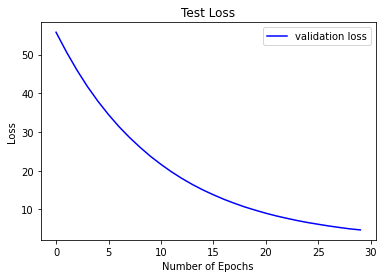

In [ ]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train loss : %.3f %% , Test loss : %.3f %%' % (train_mse[0]*100, test_mse[0]*100))
print('Train accuracy : %.3f %% , Test accuracy : %.3f %%' % (train_mse[1]*100, test_mse[1]*100))

Train loss : 469.423 % , Test loss : 468.629 %
Train accuracy : 35.780 % , Test accuracy : 36.360 %
